In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras.preprocessing import image
from os import listdir
from PIL import Image as PImage
from tensorflow.keras.applications.inception_v3 import decode_predictions
from tensorflow.keras.applications.inception_v3 import preprocess_input
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import MaxPooling2D
from keras.layers import Conv2D, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
folder_path = '/content/drive/MyDrive/Scraped_images/'

In [3]:
folder_path = '/content/drive/MyDrive/Scraped_images/'
images = os.listdir(folder_path)
images[::150]

['saree_3.jpeg',
 'saree_151.jpeg',
 'saree_289.jpeg',
 'Trouser_157.jpeg',
 'Trouser_298.jpeg',
 'Jean_150.jpeg',
 'Jean_295.jpeg']

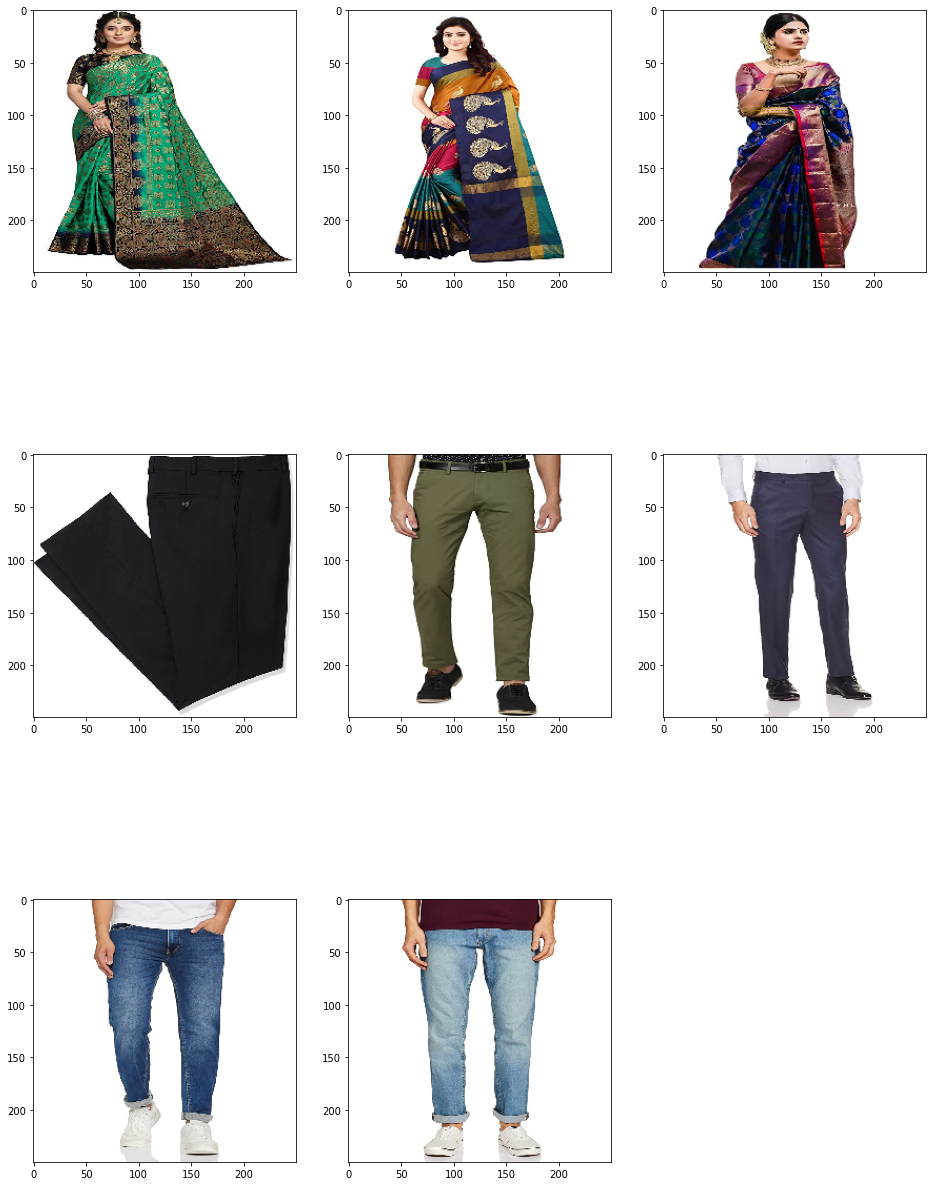

In [4]:
fig = plt.figure(figsize = (16,30))
img_width, img_height = 250, 250

i = 0
rows= 4
columns = 3
for image1 in images[::120]:
  i+=1
  img = image.load_img(folder_path + image1, target_size = (img_width, img_height))
  fig.add_subplot(rows, columns, i)
  fig.subplots_adjust(hspace = .5)
  plt.imshow(img)


In [5]:
label = []
folder = '/content/drive/MyDrive/Scraped_images'

for file in listdir(folder):
  if file.startswith('s'):
    label.append(1.0)
  elif file.startswith('T'):
    label.append(2.0)
  elif file.startswith('J'):
    label.append(3.0)

print(label)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [6]:
photos = []
folder = '/content/drive/MyDrive/Scraped_images/'
for file in listdir(folder):
  img1 = image.load_img(folder + file, target_size = (250, 250))
  image_data = image.img_to_array(img1)
  photos.append(image_data)

In [7]:
photos = np.asarray(photos)
label = np.asarray(label)

In [8]:
print(photos.shape)
print(label.shape)

(922, 250, 250, 3)
(922,)


In [9]:
# defining independent and target variables
x = photos
y = label

In [10]:
y = np_utils.to_categorical(y-1, 3)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [11]:
y.shape

(922, 3)

## Scaling

In [12]:
# scaling the image
x = x/255
print(x)

[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]


 [[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1

In [13]:
# splitting dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=51)

In [14]:
print(x_train.shape) 
print(y_train.shape)

print(x_test.shape)
print( y_test.shape)

(737, 250, 250, 3)
(737, 3)
(185, 250, 250, 3)
(185, 3)


In [15]:
# augmentation of image data
img_gen = ImageDataGenerator(rotation_range = 40,  
        width_shift_range = 0.2, 
        height_shift_range=0.2,  
        shear_range = 0.20,  
        zoom_range = 0.20, 
        horizontal_flip = True,  
        fill_mode = 'nearest')

img_gen.fit(x_train)

In [16]:
# training_datagen = ImageDataGenerator(rescale = 1./255,
#                                       rotation_range = 40,
#                                       width_shift_range = 0.2,
#                                       height_shift_range=0.2,
#                                       shear_range = 0.20,
#                                       zoom_range = 0.20,
#                                       horizontal_flip = True,
#                                       fill_mode = 'nearest')

In [17]:
# folder = '/content/drive/MyDrive/Scraped_images/'
# training_data = training_datagen.flow_from_directory(folder,     # This is a target directory
#                                       target_size = (150, 150),  # all image resized to 150x150
#                                       batch_size = 32,
#                                       class_mode = 'categorical') # Since we use binary_crossentropy loss, we need binary labels 
 
# training_data.class_indices 

In [18]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import MaxPooling2D
from keras.layers import Conv2D, Dropout

from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
model = Sequential()
# First Convolution
model.add(Conv2D(32, strides =(1,1), kernel_size = 3, padding ='valid',  activation = 'relu', input_shape = [250, 250, 3] ))
model.add(MaxPooling2D(pool_size = (2,2) ))
# Second Convolution
model.add(Conv2D(filters = 64, kernel_size = 3))
model.add(MaxPooling2D(pool_size = (2,2)))
# Third Convolution
model.add(Conv2D(filters = 64, kernel_size = 3))
model.add(MaxPooling2D(pool_size = (2,2)))
# Fourth Convolution
model.add(Conv2D(filters = 128, kernel_size = 3))
model.add(MaxPooling2D(pool_size = (2,2)))
# Fifth Convolution
model.add(Conv2D(filters = 256, kernel_size = 3))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
# Flattening the layers
model.add(Flatten() )
model.add(Dense( units = 128, activation= 'relu' ))
model.add(Dropout(0.1))
model.add(Dense( units = 256, activation= 'relu' ))
model.add(Dropout(0.20))
# Final Output
model.add(Dense( units = 3, activation= 'softmax' ))

In [20]:
# Compile the model and creating callback_list
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_path = '/content/drive/MyDrive/classificaton_prediction.h5'
checkpoint = ModelCheckpoint(model_path, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
callback_list = [checkpoint]

In [21]:
# Fit the model
history = model.fit(x_train, y_train, epochs = 50, verbose = 1, validation_split = 0.20, callbacks = callback_list )  

Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 0.8263 - accuracy: 0.5722
Epoch 1: val_accuracy improved from -inf to 0.74324, saving model to /content/drive/MyDrive/classificaton_prediction.h5
19/19 [==============================] - 15s 227ms/step - loss: 0.8263 - accuracy: 0.5722 - val_loss: 0.5049 - val_accuracy: 0.7432
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 0.5968 - accuracy: 0.7114
Epoch 2: val_accuracy improved from 0.74324 to 0.80405, saving model to /content/drive/MyDrive/classificaton_prediction.h5
19/19 [==============================] - 3s 136ms/step - loss: 0.5968 - accuracy: 0.7114 - val_loss: 0.4104 - val_accuracy: 0.8041
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 0.4415 - accuracy: 0.8014
Epoch 3: val_accuracy improved from 0.80405 to 0.83108, saving model to /content/drive/MyDrive/classificaton_prediction.h5
19/19 [==============================] - 3s 134ms/step - loss: 0.4415 - accuracy: 0.8014 

In [22]:
print("Accuracy : ", model.evaluate(x_test, y_test))

6/6 [==============================] - 1s 121ms/step - loss: 1.1974 - accuracy: 0.8000
Accuracy :  [1.1974397897720337, 0.800000011920929]


In [23]:
# Prediction on the test image
y_pred = model.predict(x_test, verbose=1)
y_pred = np.argmax(y_pred, axis=1)

6/6 [==============================] - 0s 44ms/step


In [24]:
y_test_labels = np.argmax(y_test, axis=1)
print(y_test_labels[0])

1


In [25]:
y_pred[0]

1

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


[Text(0, 0.5, 'sarees'), Text(0, 1.5, 'jeans'), Text(0, 2.5, 'trousers')]

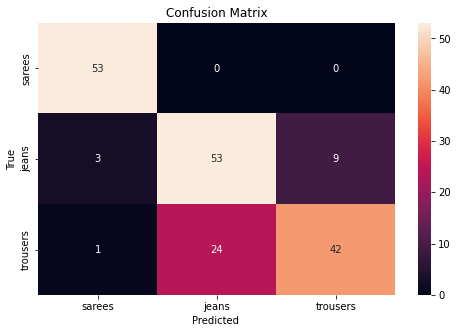

In [27]:
# Confusion matrix for results
cm = confusion_matrix(y_test_labels, y_pred)

fig, ax= plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='g', ax =ax) # annot=True to annotate cells. 'fmt' prevents the numbers from going to scientific notation

# # labels, title and ticks
ax.set_xlabel('Predicted ')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['sarees','jeans','trousers']) 
ax.yaxis.set_ticklabels(['sarees', 'jeans','trousers'])

In [28]:
y_test[0]

array([0., 1., 0.], dtype=float32)

In [29]:
y_pred[0]

1

In [32]:
test_labels=y_test_labels.tolist()  

def get_image_and_class(size):
  index = np.random.randint(len(x_test), size=size) # for getting random image from test dataset
  for i in range(len(index)):
    plt.imshow(x_test[index,:][i]) 
    plt.show()
    
  # Print the class of the random image picked above
    if test_labels[index[i]] == 0:
      print('Sarees')
    elif test_labels[index[i]] == 1:
      print('Trousers')
    elif test_labels[index[i]] == 2:
      print('Jeans')

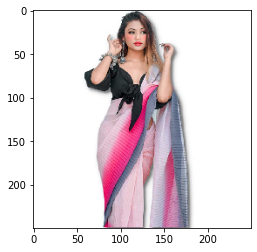

Sarees


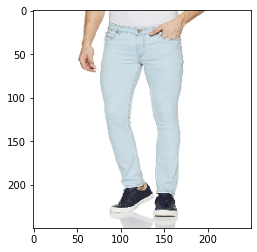

Jeans


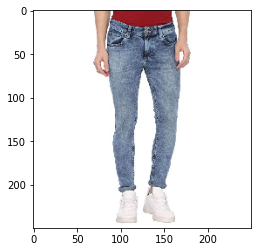

Jeans


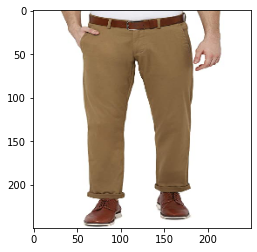

Trousers


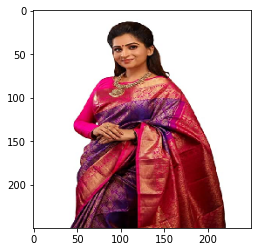

Sarees


In [34]:
get_image_and_class(5)

In [35]:
model_path = '/content/drive/My Drive/classification_prediction.h5'
model.save(model_path)

In [36]:
import warnings
warnings.filterwarnings('ignore')

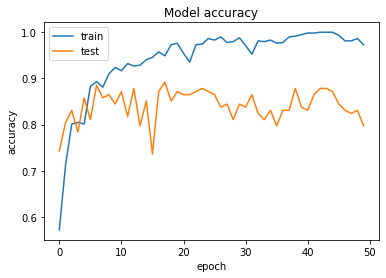

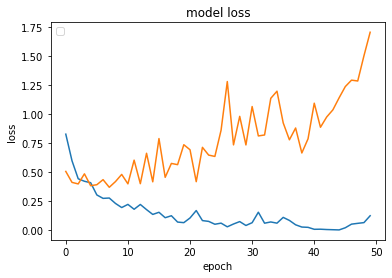

In [37]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()


# Summarize History for loss
plt.plot (history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], ['test'], loc = 'upper left')
plt.show()

In [ ]:
# plt.figure(figsize=(7,4))
# plt.plot([i+1 for i in range(12)],history.history['accuracy'],markersize=9)
# # plt.grid(True)
# plt.title("Training accuracy with epochs\n",fontsize=18)
# plt.xlabel("Training epochs",fontsize=15)
# plt.ylabel("Training accuracy",fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.show()

In [ ]:
# plt.figure(figsize=(7,4))
# plt.plot([i+1 for i in range(12)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
# plt.grid(True)
# plt.title("Training loss with epochs\n",fontsize=18)
# plt.xlabel("Training epochs",fontsize=15)
# plt.ylabel("Training loss",fontsize=15)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.show()